In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

list_names = ['User1','User3', 'User4', 'User5', 'User6', 'User7', 'User8']
nbUsers = len(list_names)

addword = ''

In [2]:
nbUsers

7

In [3]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')

In [4]:
finalData = pd.DataFrame()
for user in range(0, int(nbUsers)):   
    finalUser = pd.DataFrame()
    finalUser = pd.read_csv('./Analysis/ValidateMe/'+ list_names[user]+ addword+ '.csv', sep = ";", decimal = '.')
    del finalUser['Unnamed: 0']
    finalUser['User'] = list_names[user]
    
    finalData = pd.concat([finalUser, finalData], axis = 0, sort = True)

In [5]:
finalData.columns

Index(['ClosToFinal.0', 'ClosToFinal.1', 'ClosToFinal.10', 'ClosToFinal.11',
       'ClosToFinal.12', 'ClosToFinal.13', 'ClosToFinal.14', 'ClosToFinal.15',
       'ClosToFinal.16', 'ClosToFinal.17',
       ...
       'Speed.37', 'Speed.4', 'Speed.5', 'Speed.6', 'Speed.7', 'Speed.8',
       'Speed.9', 'Task', 'Time', 'User'],
      dtype='object', length=158)

In [6]:
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
scales = ['small', 'medium', 'large']

In [7]:
finalData[(finalData['Time'] == 500) & (finalData['Config'] == 3)]['PredToFinal.9'].dropna().describe()

count     6.000000
mean      5.765753
std       6.712662
min       0.000000
25%       2.250929
50%       3.645154
75%       6.049404
max      18.667204
Name: PredToFinal.9, dtype: float64

## Average all phalanges per Time interval (keep User discrimination)

In [8]:
meanHands = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    for time in range(0, 3050, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(0, 38):
            if('PredToFinal.'+str(phal) in finalData[condUser].columns):
                #if(np.isnan(finalData[condUser]['PredToFinal.'+str(phal)]) == False):
                if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1
                    
                if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanHands = pd.concat([meanHand, meanHands], axis = 0, sort = False)
        

In [9]:
meanHands.head()

Predictions  Positions   Closest       Speed   User  Time
0       0.899094   0.054456  0.899094  230.000731  User8     0
50      1.718629   2.586016  1.717310  116.787272  User8    50
100     3.544387   5.561428  3.543507  117.294047  User8   100
150     4.342050   6.902429  4.341391  104.537677  User8   150
200     5.935976   9.197652  5.930211   99.716815  User8   200

In [10]:
meanHands.to_csv('./Analysis/AllUsers-Summary/AllHands-'+ addword +'.csv', sep = ';')

## Right Hand

In [11]:
meanRHand = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    for time in range(0, 3050, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(0, 19):
            if('PredToFinal.'+str(phal) in finalData[condUser].columns):
                #if(np.isnan(finalData[condUser]['PredToFinal.'+str(phal)]) == False):
                if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1
                    
                if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanRHand = pd.concat([meanHand, meanRHand], axis = 0, sort = False)
        

In [12]:
meanRHand.head()

Predictions  Positions   Closest       Speed   User  Time
0       0.676654   0.063156  0.676654  218.240163  User8     0
50      1.346558   2.343577  1.344581  115.287730  User8    50
100     1.713946   3.632626  1.712628   92.938834  User8   100
150     2.308358   4.895440  2.307369   85.767122  User8   150
200     3.443170   6.721254  3.434485   86.028866  User8   200

In [13]:
meanRHand.to_csv('./Analysis/AllUsers-Summary/RightHand-'+ addword +'.csv', sep = ';')

## Right Thumb and Index

In [14]:
meanRTI = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    
    for time in range(0, 3050, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(6, 10, 3):
            if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                nbPhal = nbPhal + 1

            if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                nbPhalPos = nbPhalPos + 1
                
            if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                nbPhalClos = nbPhalClos + 1
                
            if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanRTI = pd.concat([meanHand, meanRTI], axis = 0, sort = False)
        

In [15]:
meanRTI.head()

Predictions  Positions   Closest      Speed   User  Time
0       0.493123   0.015533  0.493123  77.990417  User8     0
50      0.977141   1.851533  0.977141  63.286566  User8    50
100     1.423695   3.225666  1.423695  60.901976  User8   100
150     1.723350   4.288707  1.723350  60.427474  User8   150
200     2.279771   5.671248  2.279771  63.830515  User8   200

In [16]:
meanRTI.to_csv('./Analysis/AllUsers-Summary/RTI-'+ addword +'.csv', sep = ';')

## Right Thumb

In [17]:
meanT = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    
    for time in range(0, 3050, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(6, 7):
            if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                nbPhal = nbPhal + 1

            if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                nbPhalPos = nbPhalPos + 1
                
            if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                nbPhalClos = nbPhalClos + 1

            if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanT = pd.concat([meanHand, meanT], axis = 0, sort = False)
       

In [18]:
meanT.head()

Predictions  Positions   Closest      Speed   User  Time
0       0.520116   0.000000  0.520116        NaN  User8     0
50      0.952111   1.968951  0.952111  58.179570  User8    50
100     1.425085   3.283535  1.425085  59.021941  User8   100
150     1.661796   4.384435  1.661796  60.659666  User8   150
200     2.068691   5.760434  2.068691  65.382092  User8   200

In [19]:
meanT.to_csv('./Analysis/AllUsers-Summary/RT-'+ addword +'.csv', sep = ';')

## Right Index

In [20]:
meanI = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    for time in range(0, 3050, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(9, 10):
            if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                nbPhal = nbPhal + 1

            if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                nbPhalPos = nbPhalPos + 1
                
            if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                nbPhalClos = nbPhalClos + 1
            
            if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanI = pd.concat([meanHand, meanI], axis = 0, sort = False)

In [21]:
meanI.head()

Predictions  Positions   Closest      Speed   User  Time
0       0.466129   0.031065  0.466129  77.990417  User8     0
50      1.002171   1.734115  1.002171  65.840064  User8    50
100     1.422305   3.167796  1.422305  62.155333  User8   100
150     1.784905   4.192978  1.784905  60.253331  User8   150
200     2.490851   5.582062  2.490851  62.589253  User8   200

In [22]:
meanI.to_csv('./Analysis/AllUsers-Summary/RI-'+ addword +'.csv', sep = ';')

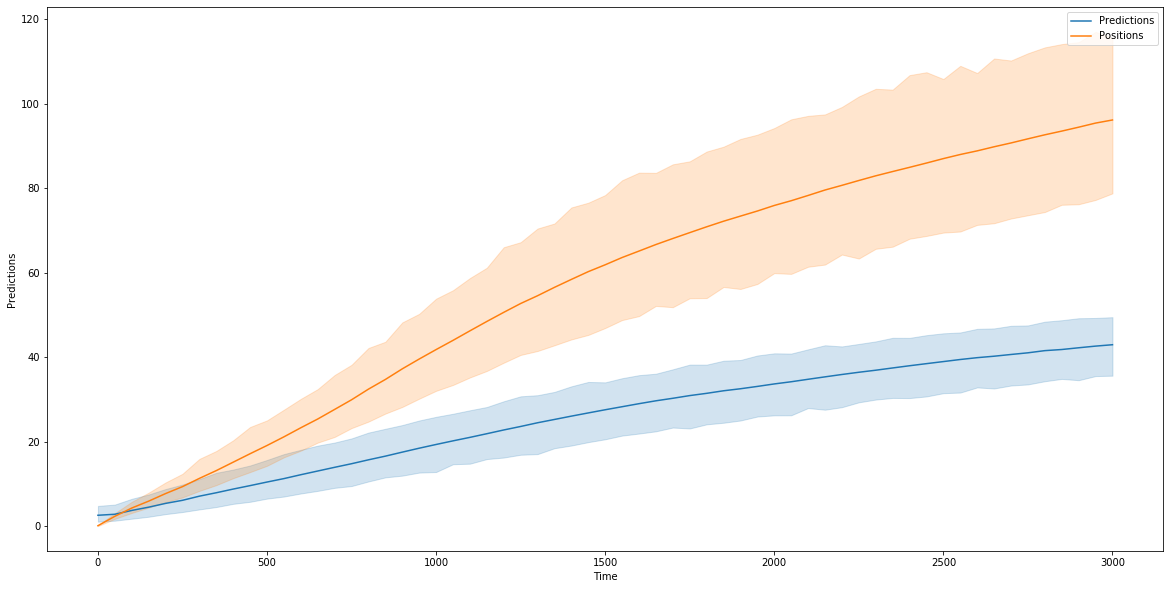

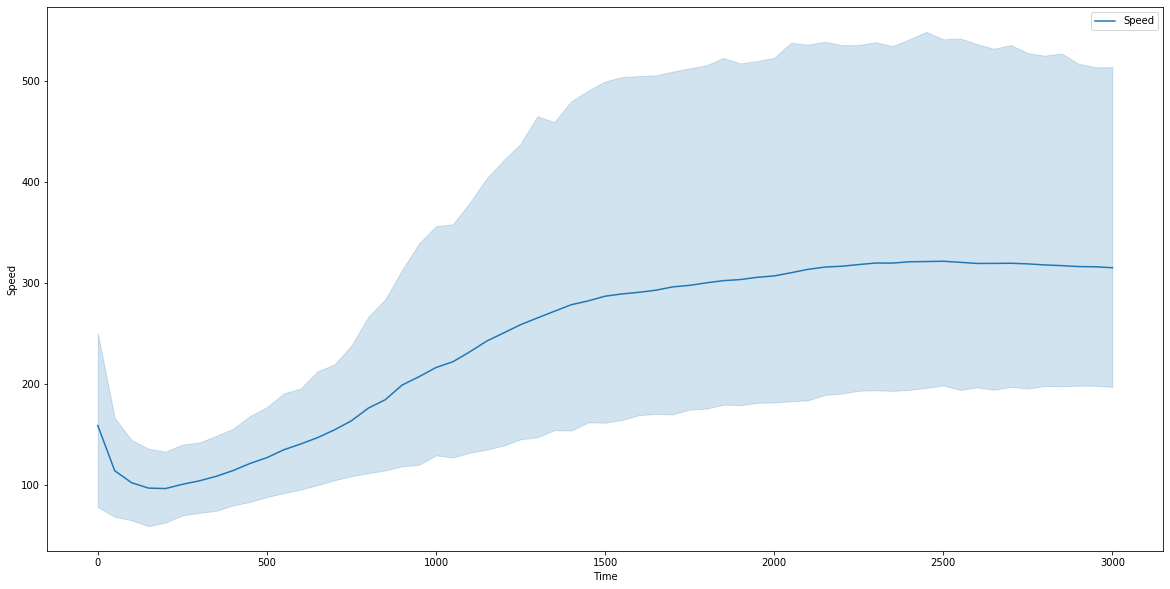

In [23]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Predictions', data = meanRTI, label = "Predictions")
sns.lineplot(x = 'Time' , y = 'Positions', data = meanRTI, label = "Positions")
#sns.lineplot(x = 'Time' , y = 'Closest', data = meanRTI, label = "Closest")

plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Speed', data = meanRTI, label = "Speed")

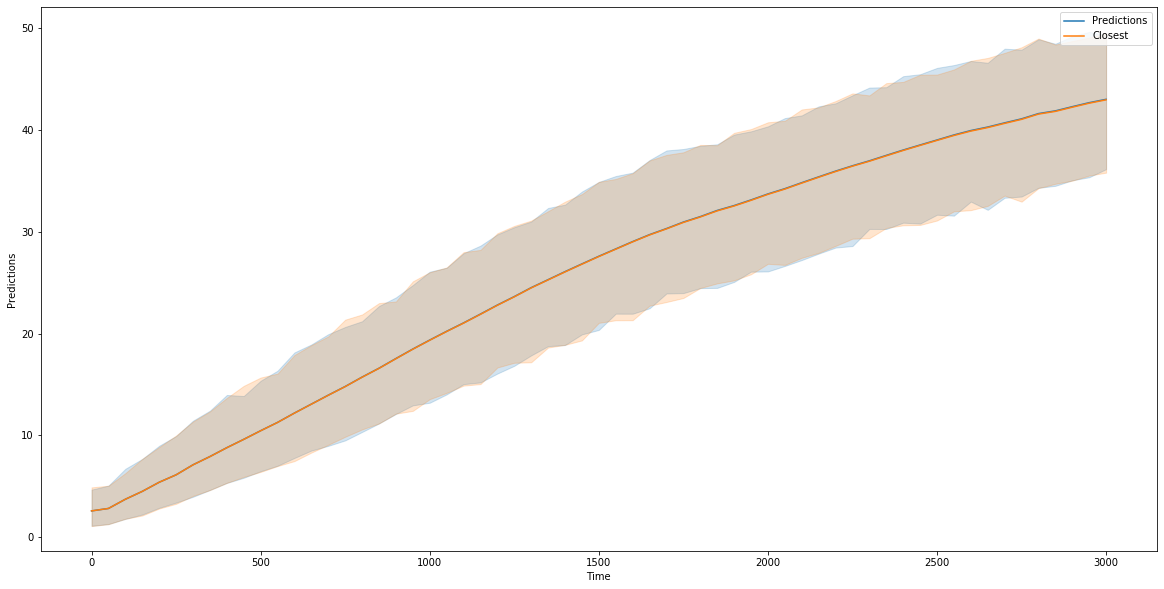

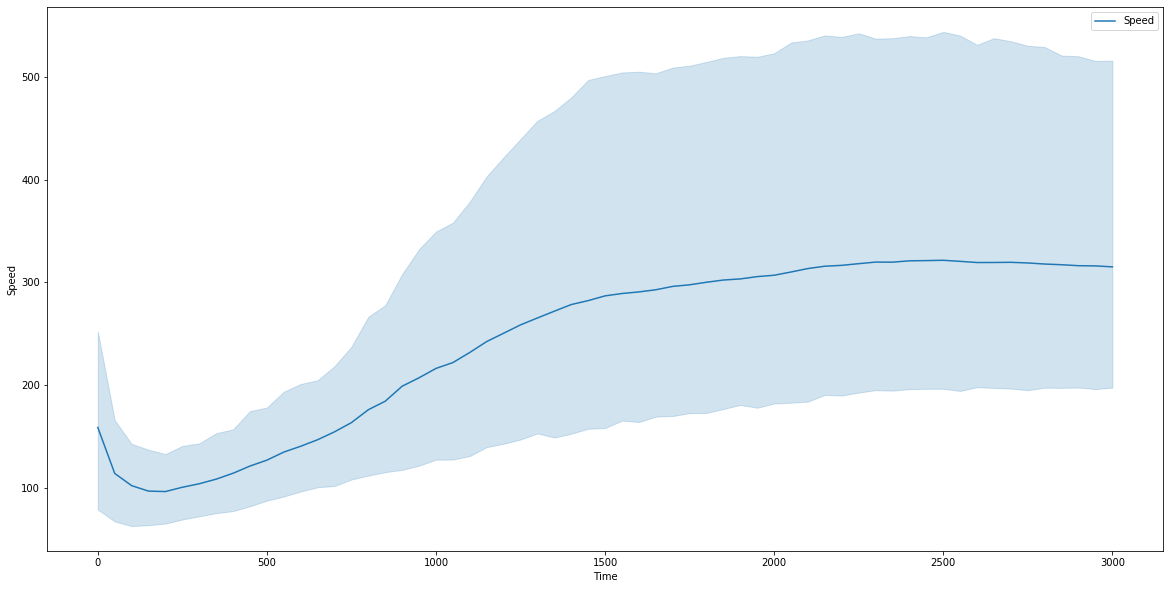

In [24]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Predictions', data = meanRTI, label = "Predictions")
sns.lineplot(x = 'Time' , y = 'Closest', data = meanRTI, label = "Closest")

plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Speed', data = meanRTI, label = "Speed")

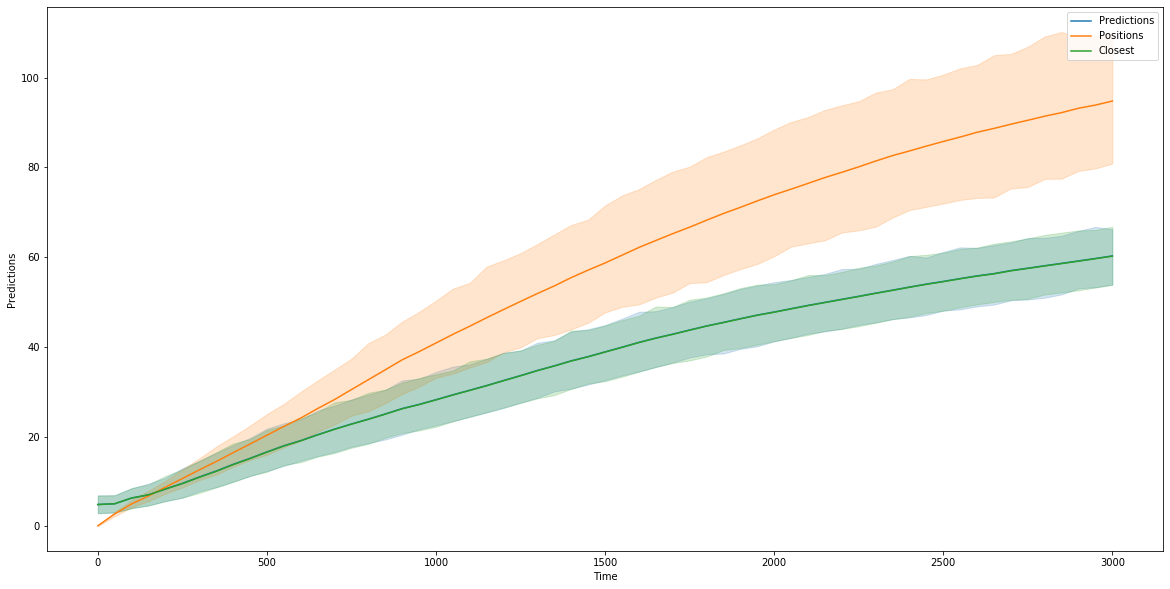

In [25]:
plt.figure(figsize = (20, 10))
#sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'User', data = meanRTI)
#sns.lineplot(x = 'Time' , y = 'Positions', hue = 'User', data = meanRTI)
#sns.lineplot(x = 'Time' , y = 'Closest', hue = 'User', data = meanRTI)

sns.lineplot(x = 'Time' , y = 'Predictions', data = meanRHand, label = "Predictions")
sns.lineplot(x = 'Time' , y = 'Positions', data = meanRHand, label = "Positions")
sns.lineplot(x = 'Time' , y = 'Closest', data = meanRHand, label = "Closest")

In [26]:
# Per User, Whole hands // Right vs Left // Index + Thumb // Index // Thumb
# All users chart - Scale etc.
# Table with results / Clos/Pos/Pred/Speedb

## Conditions

### Scales

In [27]:
meanScale = pd.DataFrame()

for scale in range(0, len(scales)):
    for user in range(0, nbUsers):
        meanHand = pd.DataFrame()

        nbPhal = 0
        nbPhalClos = 0
        nbPhalPos = 0
        nbPhalSpeed = 0

        averagePred = 0
        averagePos = 0
        averageClos = 0
        averageSpeed = 0

        for time in range(0, 3050, 50):
            cond = (finalData['Scale'] == scales[scale]) & (finalData['Time'] == time) & (finalData['User'] == list_names[user])

            for phal in range(0, 38):
                if(len(finalData[cond]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[cond]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[cond]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[cond]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[cond]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[cond]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1

                if(len(finalData[cond]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[cond]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1


            if(nbPhal != 0):
                meanHand.loc[time, 'Predictions'] = averagePred/nbPhal

            if(nbPhalPos != 0):
                meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos

            if(nbPhalClos != 0):
                meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos

            if(nbPhalSpeed != 0):
                meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
                
                
        meanHand['User'] = list_names[user]
        meanHand['Scale'] = scales[scale]
        meanHand['Time'] = meanHand.index
        meanScale = pd.concat([meanHand, meanScale], axis = 0, sort = False)

In [28]:
meanScale.head()

Predictions  Positions   Closest      Speed   User  Scale  Time
0       0.938469   0.000000  0.938469        NaN  User8  large     0
50      1.049458   1.104559  1.049458  30.480300  User8  large    50
100     1.191544   1.671242  1.191544  32.637274  User8  large   100
150     1.406017   2.643214  1.406017  39.940476  User8  large   150
200     1.643054   3.507312  1.643054  41.105498  User8  large   200

In [29]:
meanScale.to_csv('./Analysis/AllUsers-Summary/Scales-'+ addword +'.csv', sep = ';')

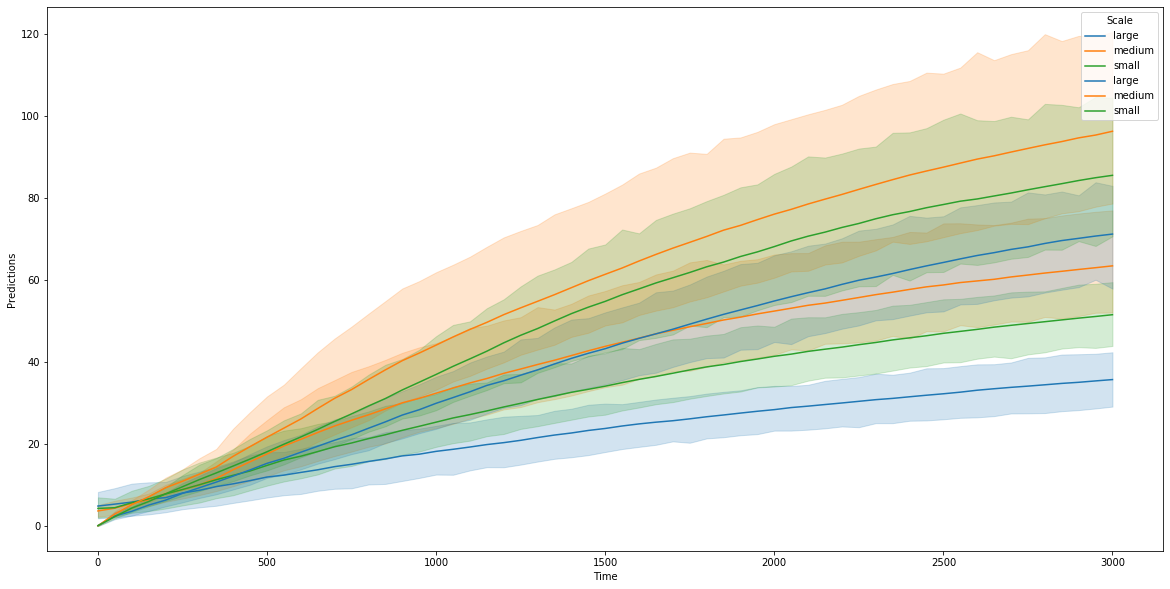

In [30]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'Scale', data = meanScale)
sns.lineplot(x = 'Time' , y = 'Positions', hue = 'Scale', data = meanScale)
#sns.lineplot(x = 'Time' , y = 'Closest', data = meanScale, label = "Closest")

In [31]:
meanScaleRTI = pd.DataFrame()

for scale in range(0, len(scales)):
    for user in range(0, nbUsers):
        meanHand = pd.DataFrame()

        nbPhal = 0
        nbPhalClos = 0
        nbPhalPos = 0
        nbPhalSpeed = 0

        averagePred = 0
        averagePos = 0
        averageClos = 0
        averageSpeed = 0

        for time in range(0, 3050, 50):
            cond = (finalData['Scale'] == scales[scale]) & (finalData['Time'] == time) & (finalData['User'] == list_names[user])

            for phal in range(6, 10, 3):
                if(len(finalData[cond]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[cond]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[cond]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[cond]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[cond]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[cond]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1

                if(len(finalData[cond]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[cond]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1


            if(nbPhal != 0):
                meanHand.loc[time, 'Predictions'] = averagePred/nbPhal

            if(nbPhalPos != 0):
                meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos

            if(nbPhalClos != 0):
                meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos

            if(nbPhalSpeed != 0):
                meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
                
                
        meanHand['User'] = list_names[user]
        meanHand['Scale'] = scales[scale]
        meanHand['Time'] = meanHand.index
        meanScaleRTI = pd.concat([meanHand, meanScaleRTI], axis = 0, sort = False)

In [32]:
meanScaleRTI.head()

Predictions  Positions   Closest      Speed   User  Scale  Time
0       0.461509   0.000000  0.461509        NaN  User8  large     0
50      0.875970   1.534631  0.875970  44.572816  User8  large    50
100     1.189799   2.735812  1.189799  49.006534  User8  large   100
150     1.370870   3.836211  1.370870  51.969681  User8  large   150
200     1.606586   5.086158  1.606586  53.674049  User8  large   200

In [33]:
meanScaleRTI.to_csv('./Analysis/AllUsers-Summary/Scales-RTI-'+ addword +'.csv', sep = ';')

In [34]:
meanScaleRTI['Speed_m_per_sec'] = meanScaleRTI['Speed']/1000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


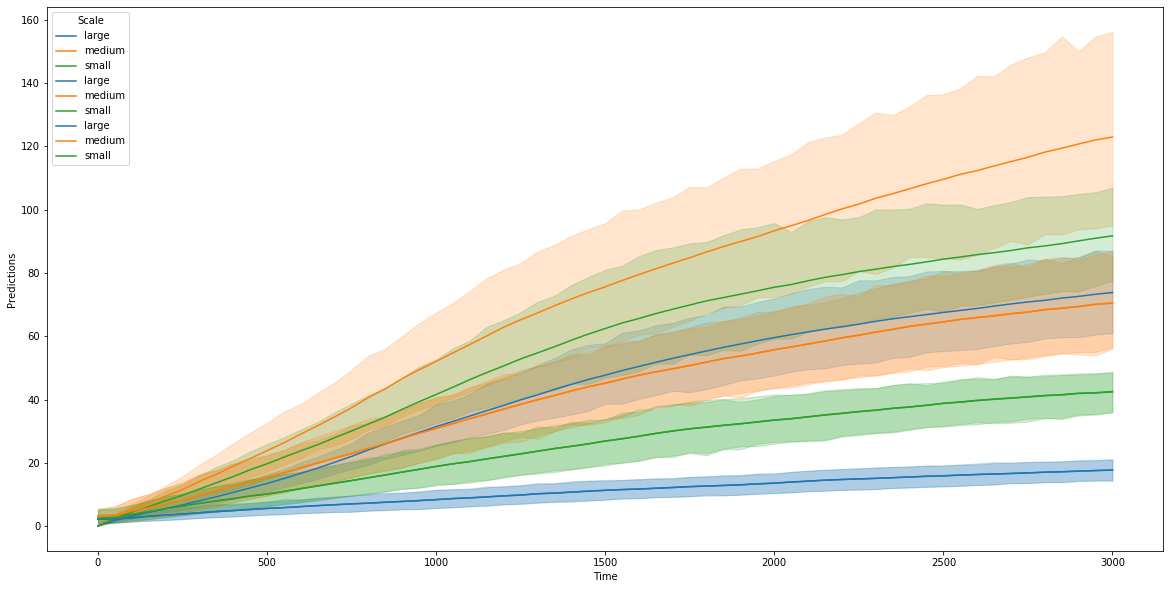

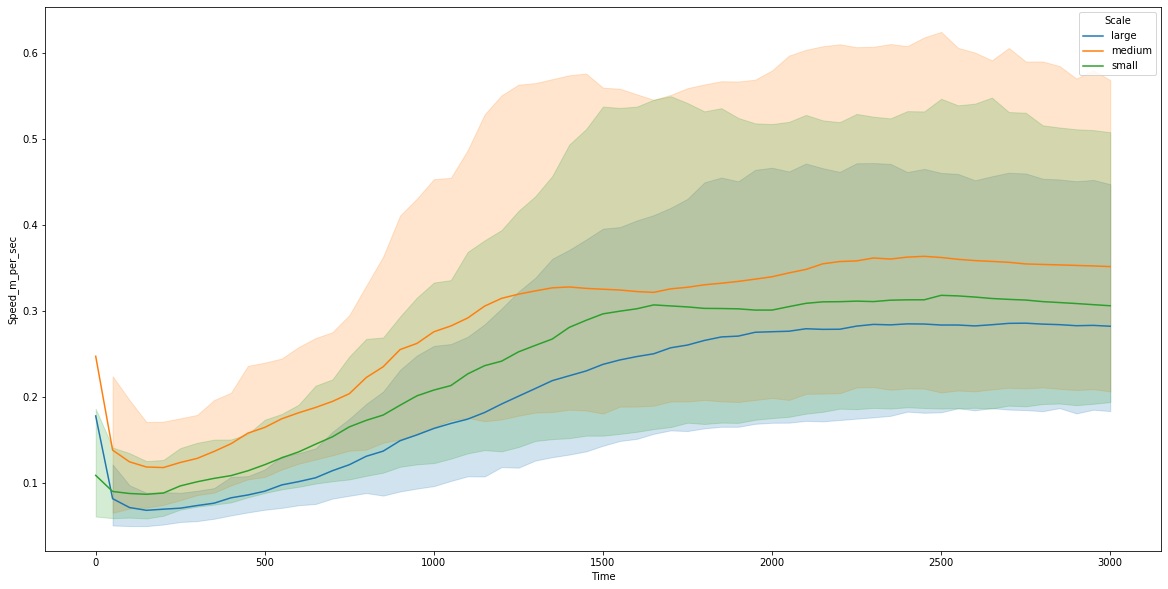

In [35]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'Scale', data = meanScaleRTI)
sns.lineplot(x = 'Time' , y = 'Positions', hue = 'Scale', data = meanScaleRTI)
sns.lineplot(x = 'Time' , y = 'Closest', hue = 'Scale', data = meanScaleRTI)

plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Speed_m_per_sec', hue = 'Scale', data = meanScaleRTI)



### Tasks

In [36]:
meanTaskRTI = pd.DataFrame()

for task in range(0, len(tasks)):
    for user in range(0, nbUsers):
        meanHand = pd.DataFrame()

        nbPhal = 0
        nbPhalClos = 0
        nbPhalPos = 0
        nbPhalSpeed = 0

        averagePred = 0
        averagePos = 0
        averageClos = 0
        averageSpeed = 0

        for time in range(0, 3050, 50):
            cond = (finalData['Task'] == tasks[task]) & (finalData['Time'] == time) & (finalData['User'] == list_names[user])

            for phal in range(6, 10, 3):
                if(len(finalData[cond]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[cond]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[cond]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[cond]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[cond]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[cond]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1

                if(len(finalData[cond]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[cond]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1


            if(nbPhal != 0):
                meanHand.loc[time, 'Predictions'] = averagePred/nbPhal

            if(nbPhalPos != 0):
                meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos

            if(nbPhalClos != 0):
                meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos

            if(nbPhalSpeed != 0):
                meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
                
                
        meanHand['User'] = list_names[user]
        meanHand['Time'] = meanHand.index

        meanHand['Task'] = tasks[task]
        meanTaskRTI = pd.concat([meanHand, meanTaskRTI], axis = 0, sort = False)

In [37]:
meanTaskRTI.tail()

Predictions   Positions    Closest       Speed   User  Time   Task
2800    33.663051  135.347647  33.457747  690.579762  User1  2800  Touch
2850    33.546239  137.212663  33.344475  682.316053  User1  2850  Touch
2900    33.704523  138.285548  33.506179  673.835559  User1  2900  Touch
2950    33.848923  140.307607  33.653884  670.771316  User1  2950  Touch
3000    33.640835  140.598697  33.448994  670.109208  User1  3000  Touch

In [38]:
meanTaskRTI.to_csv('./Analysis/AllUsers-Summary/Task-RTI-'+ addword +'.csv', sep = ';')

In [39]:
meanTaskRTI['Speed_m_per_sec'] = meanTaskRTI['Speed']/1000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


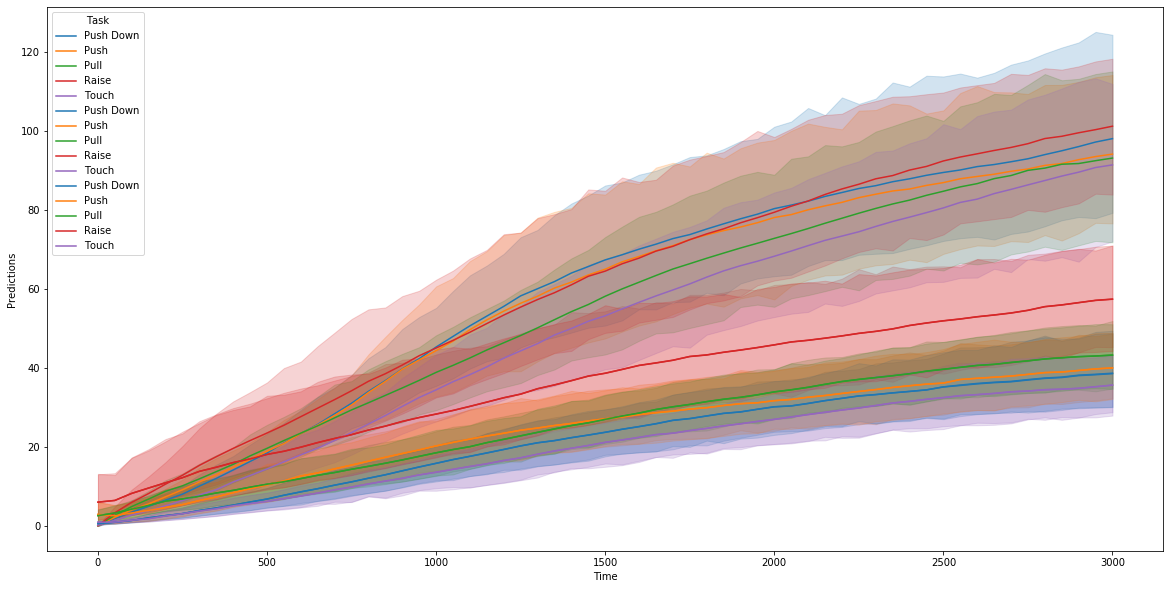

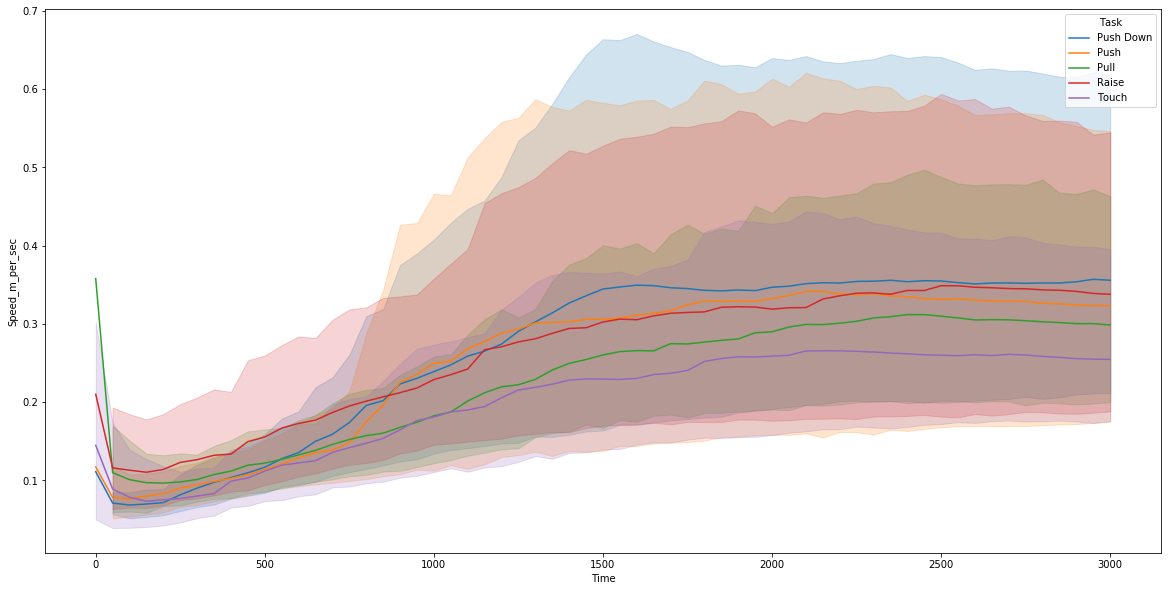

In [40]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'Task', data = meanTaskRTI)
sns.lineplot(x = 'Time' , y = 'Positions', hue = 'Task', data = meanTaskRTI)
sns.lineplot(x = 'Time' , y = 'Closest', hue = 'Task', data = meanTaskRTI)

plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Speed_m_per_sec', hue = 'Task', data = meanTaskRTI)

### Objects

In [41]:
meanObjRTI = pd.DataFrame()

for obj in range(0, len(objects)):
    for user in range(0, nbUsers):
        meanHand = pd.DataFrame()

        nbPhal = 0
        nbPhalClos = 0
        nbPhalPos = 0
        nbPhalSpeed = 0

        averagePred = 0
        averagePos = 0
        averageClos = 0
        averageSpeed = 0

        for time in range(0, 3050, 50):
            cond = (finalData['Obj'] == objects[obj]) & (finalData['Time'] == time) & (finalData['User'] == list_names[user])

            for phal in range(6, 10, 3):
                if(len(finalData[cond]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[cond]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[cond]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[cond]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[cond]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[cond]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1

                if(len(finalData[cond]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[cond]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1


            if(nbPhal != 0):
                meanHand.loc[time, 'Predictions'] = averagePred/nbPhal

            if(nbPhalPos != 0):
                meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos

            if(nbPhalClos != 0):
                meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos

            if(nbPhalSpeed != 0):
                meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
                
                
        meanHand['User'] = list_names[user]
        meanHand['Time'] = meanHand.index

        meanHand['Obj'] = objects[obj]
        meanObjRTI = pd.concat([meanHand, meanObjRTI], axis = 0, sort = False)

In [42]:
meanObjRTI.tail()

Predictions   Positions    Closest        Speed   User  Time   Obj
2800    37.422477  131.225870  37.286325  1012.513883  User1  2800  obj0
2850    37.246825  131.778289  37.105450   997.637182  User1  2850  obj0
2900    37.070279  132.430052  36.931300   985.684896  User1  2900  obj0
2950    36.864893  132.973829  36.728231   976.654982  User1  2950  obj0
3000    36.657722  133.451247  36.523300   963.599272  User1  3000  obj0

In [43]:
meanObjRTI.to_csv('./Analysis/AllUsers-Summary/Obj-RTI-'+ addword +'.csv', sep = ';')

In [44]:
meanObjRTI['Speed_m_per_sec'] = meanObjRTI['Speed']/1000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


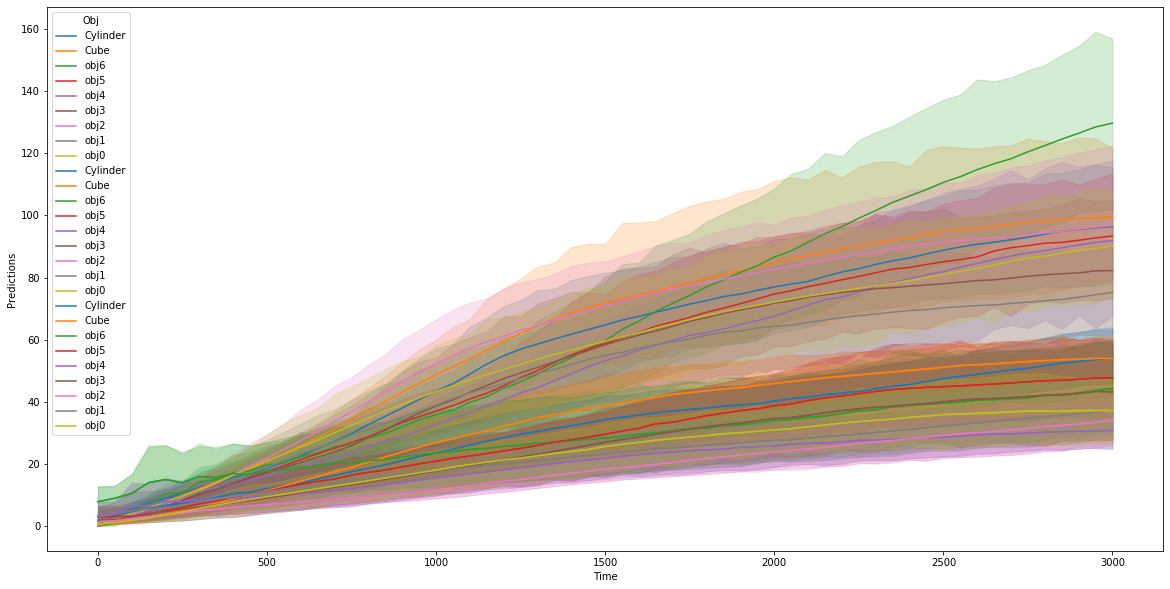

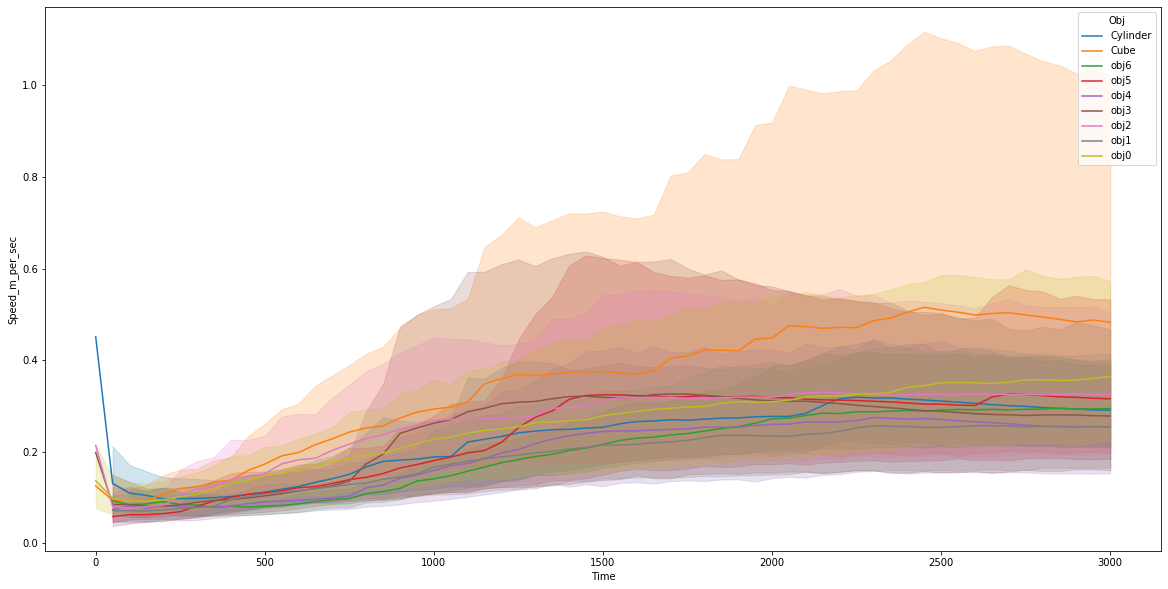

In [45]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'Obj', data = meanObjRTI)
sns.lineplot(x = 'Time' , y = 'Positions', hue = 'Obj', data = meanObjRTI)
sns.lineplot(x = 'Time' , y = 'Closest', hue = 'Obj', data = meanObjRTI)

plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Speed_m_per_sec', hue = 'Obj', data = meanObjRTI)

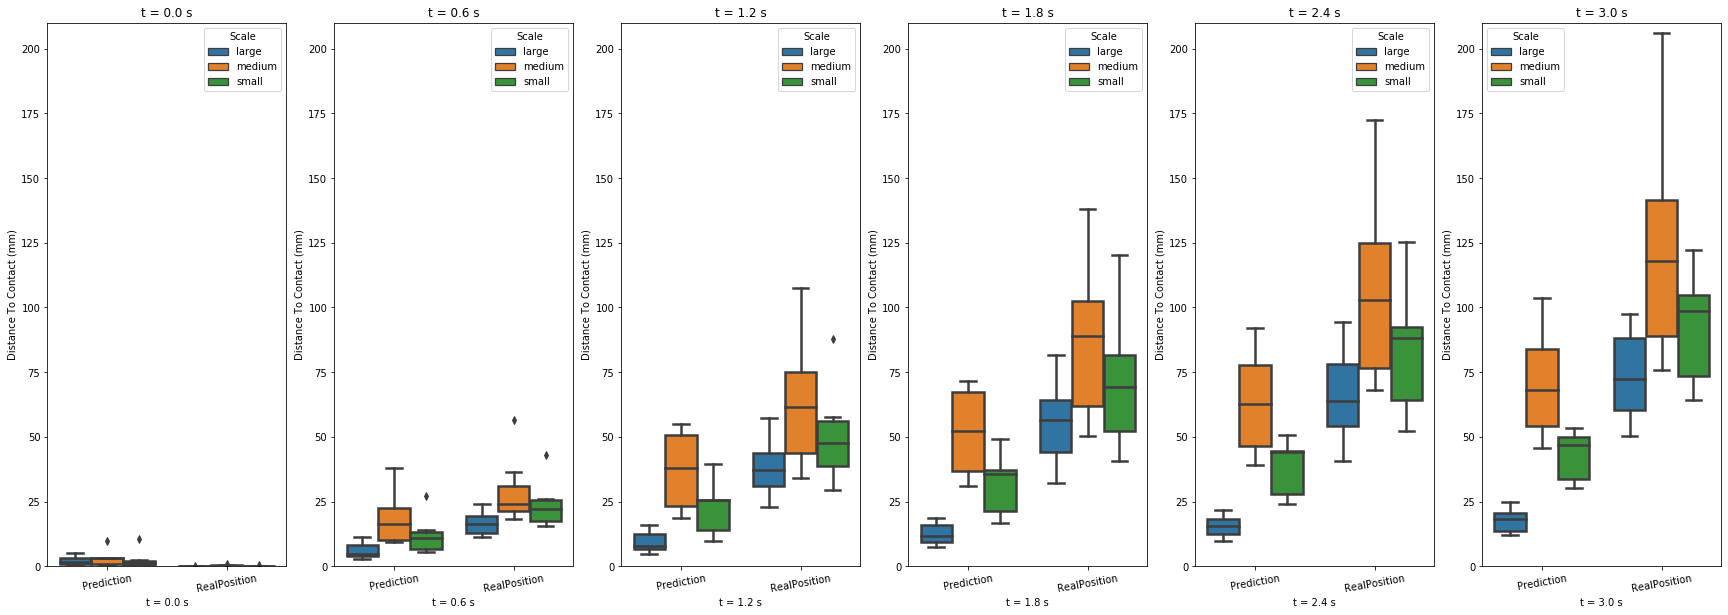

In [46]:
nameAx = []
nameFig = []
tolTime = [0, 600, 1200, 1800, 2400, 3000]
lim = [50, 150, 300, 500, 600]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):

    mdf = pd.DataFrame()
    cdf = pd.DataFrame()
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1 = pd.DataFrame(meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Predictions']).assign(Trial=1)
    #df1['DistInTolTime.'+str(tolTime[i])] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Predictions']
    df1['Scale'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Scale']
    df1['Time'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Time']
    df2 = pd.DataFrame(meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Positions']).assign(Trial=2)
    df2['Predictions'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Positions']
    df2['Scale'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Scale']
    df2['Time'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Time']

    df2.assign(Trial=2)
    cdf = pd.concat([df1, df2], sort = False)                                # CONCATENATE
    mdf = pd.melt(cdf, id_vars=['Trial','Scale','Time'],value_vars='Predictions', var_name = 'Predictions')

    nameFig[i] = sns.boxplot(x= "Trial", y="value", hue = 'Scale', data=mdf, linewidth = 2.5, ax = nameAx[i])  # RUN PLOT   
    #nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[i].set_ylabel('Distance To Contact (mm)')
    nameFig[i].set_xlabel('t = '+str(tolTime[i]/1000) + ' s')
    nameAx[i].title.set_text('t = '+str(tolTime[i]/1000) + ' s')      
    #nameFig[i].set_ylim(0, lim[i])
    
for ax in nameFig:
    tl = ['Prediction', 'RealPosition']#ax.get_xticklabels()#['Prediction/Contact', 'RealPosition/Contact'])
    ax.set_xticklabels(tl, rotation=10)
    ax.set_ylim(0, 210)

##plt.savefig('./AllFingers-38-ScaleBoxplot-Predict-RealPos.pdf')

## Summary Table Predictions/Closest/Positions at t_0, t_25%, t_50%, t_75%

In [47]:
tableTime = [0, 300, 600, 1200, 1800, 2400, 3000]
summaryTable = pd.DataFrame()
for time in range(0, len(tableTime)):
    summaryTable.loc[tableTime[time], 'Predictions_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Predictions'].mean()
    summaryTable.loc[tableTime[time], 'Predictions_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Predictions'].mean()
    summaryTable.loc[tableTime[time], 'Predictions_Index'] = meanI[meanI['Time'] == tableTime[time]]['Predictions'].mean()
    summaryTable.loc[tableTime[time], 'Predictions_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Predictions'].mean()
    summaryTable.loc[tableTime[time], 'Predictions_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Predictions'].mean()

    summaryTable.loc[tableTime[time], 'Positions_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Positions'].mean()
    summaryTable.loc[tableTime[time], 'Positions_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Positions'].mean()
    summaryTable.loc[tableTime[time], 'Positions_Index'] = meanI[meanI['Time'] == tableTime[time]]['Positions'].mean()
    summaryTable.loc[tableTime[time], 'Positions_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Positions'].mean()
    summaryTable.loc[tableTime[time], 'Positions_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Positions'].mean()

    summaryTable.loc[tableTime[time], 'Closest_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Closest'].mean()
    summaryTable.loc[tableTime[time], 'Closest_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Closest'].mean()
    summaryTable.loc[tableTime[time], 'Closest_Index'] = meanI[meanI['Time'] == tableTime[time]]['Closest'].mean()
    summaryTable.loc[tableTime[time], 'Closest_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Closest'].mean()
    summaryTable.loc[tableTime[time], 'Closest_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Closest'].mean()
    
stdTable = pd.DataFrame()
for time in range(0, len(tableTime)):
    stdTable.loc[tableTime[time], 'Predictions_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Predictions'].std()
    stdTable.loc[tableTime[time], 'Predictions_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Predictions'].std()
    stdTable.loc[tableTime[time], 'Predictions_Index'] = meanI[meanI['Time'] == tableTime[time]]['Predictions'].std()
    stdTable.loc[tableTime[time], 'Predictions_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Predictions'].std()
    stdTable.loc[tableTime[time], 'Predictions_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Predictions'].std()

    stdTable.loc[tableTime[time], 'Positions_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Positions'].std()
    stdTable.loc[tableTime[time], 'Positions_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Positions'].std()
    stdTable.loc[tableTime[time], 'Positions_Index'] = meanI[meanI['Time'] == tableTime[time]]['Positions'].std()
    stdTable.loc[tableTime[time], 'Positions_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Positions'].std()
    stdTable.loc[tableTime[time], 'Positions_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Positions'].std()

    stdTable.loc[tableTime[time], 'Closest_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Closest'].std()
    stdTable.loc[tableTime[time], 'Closest_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Closest'].std()
    stdTable.loc[tableTime[time], 'Closest_Index'] = meanI[meanI['Time'] == tableTime[time]]['Closest'].std()
    stdTable.loc[tableTime[time], 'Closest_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Closest'].std()
    stdTable.loc[tableTime[time], 'Closest_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Closest'].std()
    

In [48]:
summaryTable

Predictions_Hands  Predictions_R-Hand  Predictions_Index  \
0              3.757062            4.859255           2.592752   
300            9.759094           10.996760           7.471667   
600           20.223215           19.107800          13.112223   
1200          34.316730           32.506328          24.786917   
1800          44.965424           44.664881          33.612968   
2400          52.266662           53.332995          39.550717   
3000          57.744746           60.272423          44.259774   

      Predictions_Thumb  Predictions_RTI  Positions_Hands  Positions_R-Hand  \
0              2.606081         2.599417         0.076988          0.105227   
300            6.771043         7.121355        12.192534         12.574414   
600           11.290223        12.201223        24.956988         24.128509   
1200          20.801632        22.794274        48.326724         48.330613   
1800          29.325344        31.469156        66.146769         68.230017   
2400          36.452193        38.001455        79.817732         83.662962   
3000          41.696066        42.977920        89.441437         94.798500   

      Positions_Index  Positions_Thumb  Positions_RTI  Closest_Hands  \
0            0.158604         0.093399       0.126001       3.756408   
300         12.311069        10.349430      11.330250       9.717444   
600         25.011830        21.628306      23.320068      20.171085   
1200        54.246523        47.042792      50.644658      34.268407   
1800        76.055174        65.738506      70.896840      44.921312   
2400        90.838981        79.114998      84.976989      52.222019   
3000       102.370114        90.007340      96.188727      57.701588   

      Closest_R-Hand  Closest_Index  Closest_Thumb  Closest_RTI  
0           4.857957       2.592752       2.606081     2.599417  
300        10.922902       7.459450       6.770608     7.115029  
600        19.049966      13.093242      11.289041    12.191142  
1200       32.454666      24.757170      20.786535    22.771852  
1800       44.614288      33.571832      29.296790    31.434311  
2400       53.276305      39.508392      36.414541    37.961466  
3000       60.217176      44.192732      41.663917    42.928324

In [49]:
stdTable

Predictions_Hands  Predictions_R-Hand  Predictions_Index  \
0              1.963642            2.953575           3.179993   
300            4.255468            5.199755           5.883782   
600           12.792051            7.072370           7.814623   
1200          16.445412            9.018718          10.240328   
1800          17.943507            9.574442          10.654633   
2400          18.461628            9.715289          10.807301   
3000          17.846720            9.777056          11.572202   

      Predictions_Thumb  Predictions_RTI  Positions_Hands  Positions_R-Hand  \
0              2.629480         2.807093         0.049331          0.094395   
300            5.585374         5.648830         4.698549          3.644552   
600            7.158631         7.376235        14.779632          7.793072   
1200           9.441367         9.722382        22.636871         15.402016   
1800          10.663864        10.525340        26.438051         20.077834   
2400          11.183753        10.647513        28.941757         21.592222   
3000          10.369814        10.189598        28.608111         22.411735   

      Positions_Index  Positions_Thumb  Positions_RTI  Closest_Hands  \
0            0.182689         0.133795       0.150361       1.963109   
300          5.892017         4.787386       5.293102       4.223900   
600         10.401659         8.989251       9.503780      12.745385   
1200        21.319207        18.734627      19.381198      16.410673   
1800        27.490307        23.828356      25.064001      17.909432   
2400        29.867022        25.888485      27.298499      18.421318   
3000        31.721394        25.856922      28.312157      17.812882   

      Closest_R-Hand  Closest_Index  Closest_Thumb  Closest_RTI  
0           2.951544       3.179993       2.629480     2.807093  
300         5.150925       5.889675       5.585371     5.652718  
600         7.024088       7.813381       7.156395     7.374819  
1200        8.975495      10.233367       9.424763     9.711203  
1800        9.533961      10.630491      10.653716    10.508771  
2400        9.672295      10.797234      11.170659    10.633652  
3000        9.739311      11.582858      10.361485    10.187591

In [50]:
meanScaleRTI.columns, meanTaskRTI.columns

(Index(['Predictions', 'Positions', 'Closest', 'Speed', 'User', 'Scale', 'Time',
        'Speed_m_per_sec'],
       dtype='object'),
 Index(['Predictions', 'Positions', 'Closest', 'Speed', 'User', 'Time', 'Task',
        'Speed_m_per_sec'],
       dtype='object'))

## RTI Heatmap Task/Scale

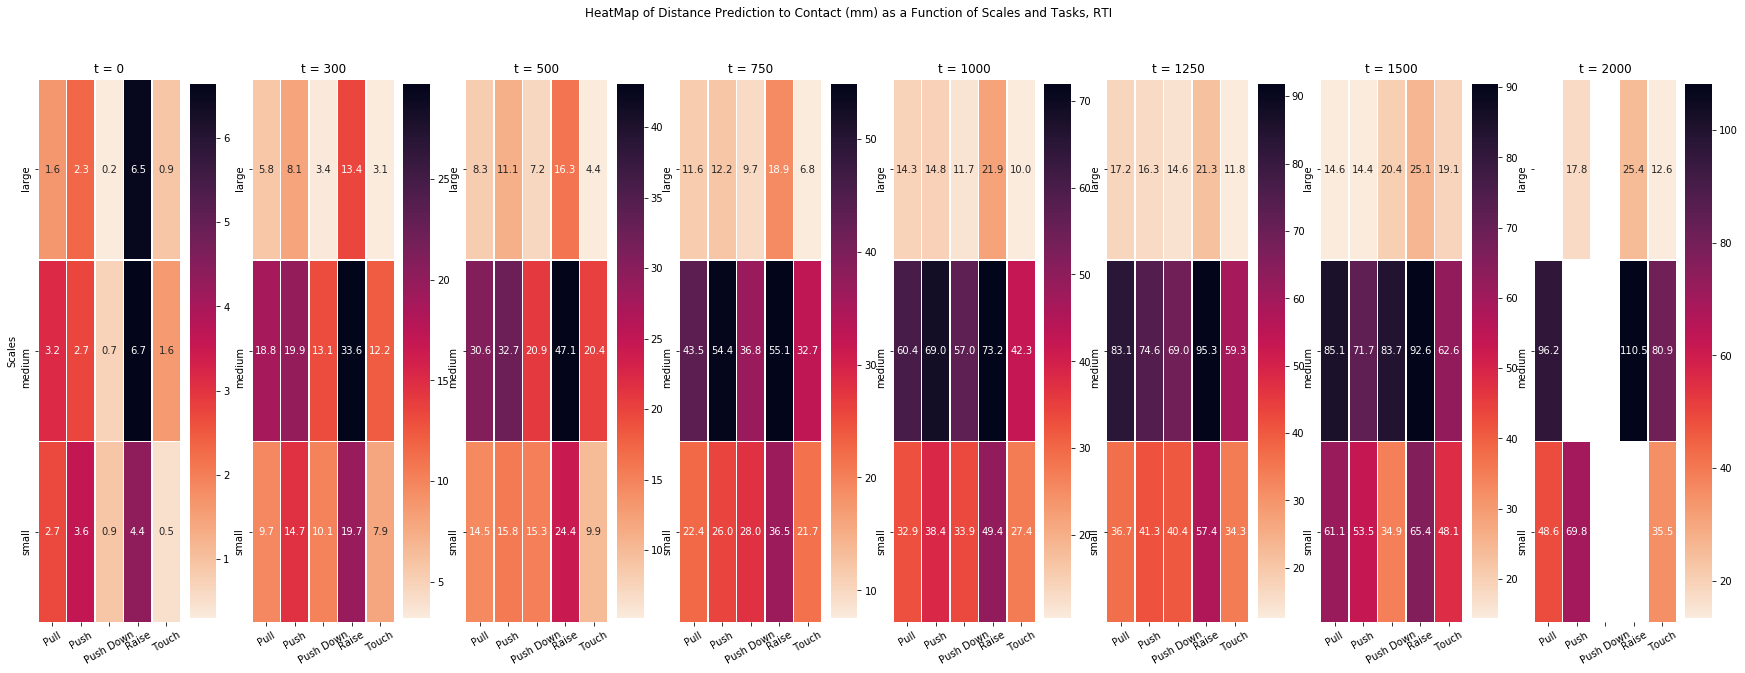

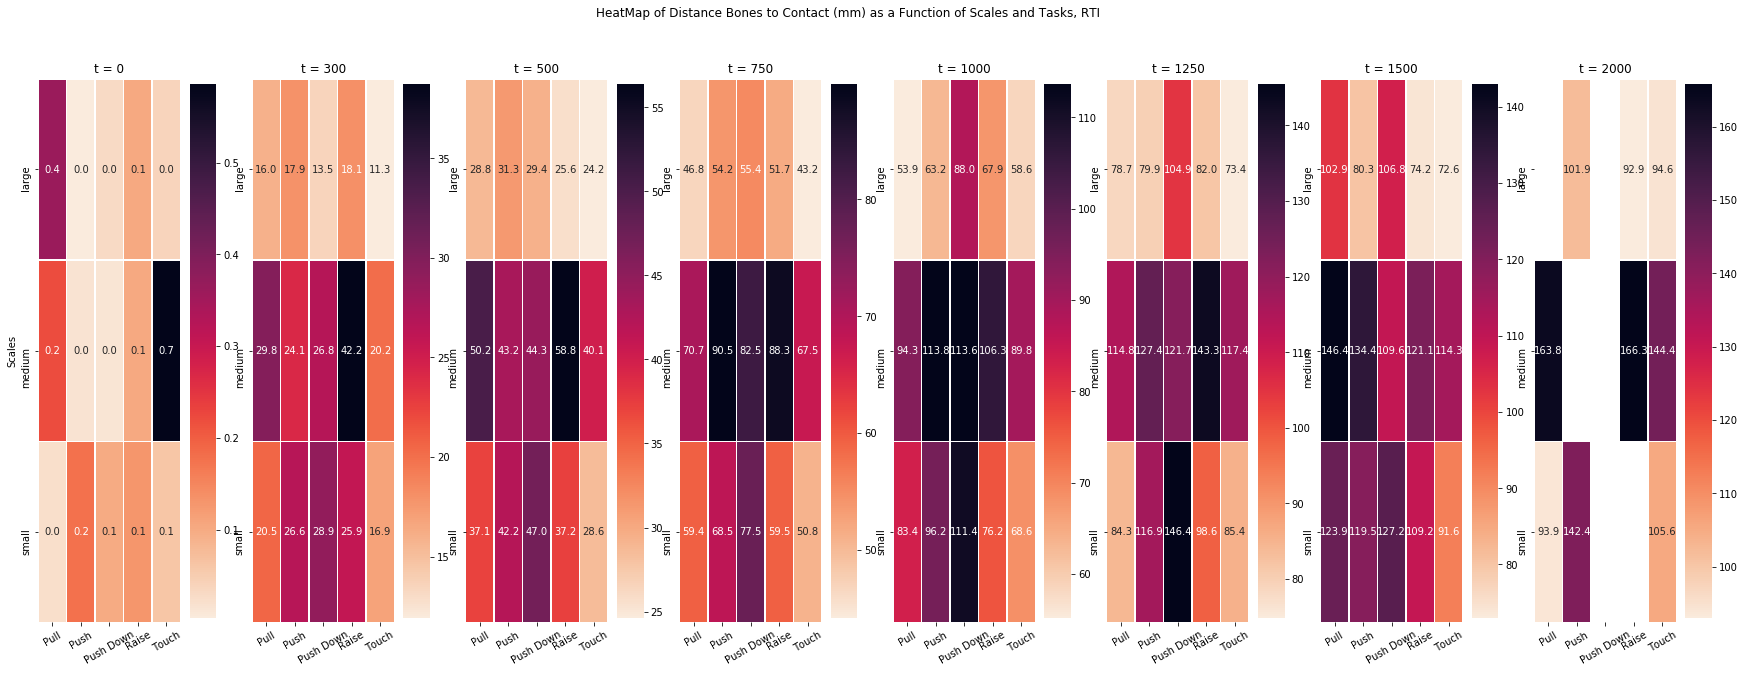

In [51]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Task'] == tasks[gest]) & (finalData['Scale'] == scales[size]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PredToFinal.9'].mean() + finalData[cond]['PredToFinal.6'].mean())/2

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Tasks, RTI')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Task'] == tasks[gest]) & (finalData['Scale'] == scales[size]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PosToFinal.9'].mean() + finalData[cond]['PosToFinal.6'].mean())/2

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Tasks, RTI')

plt.show()

## RTI Heatmap Task/Object

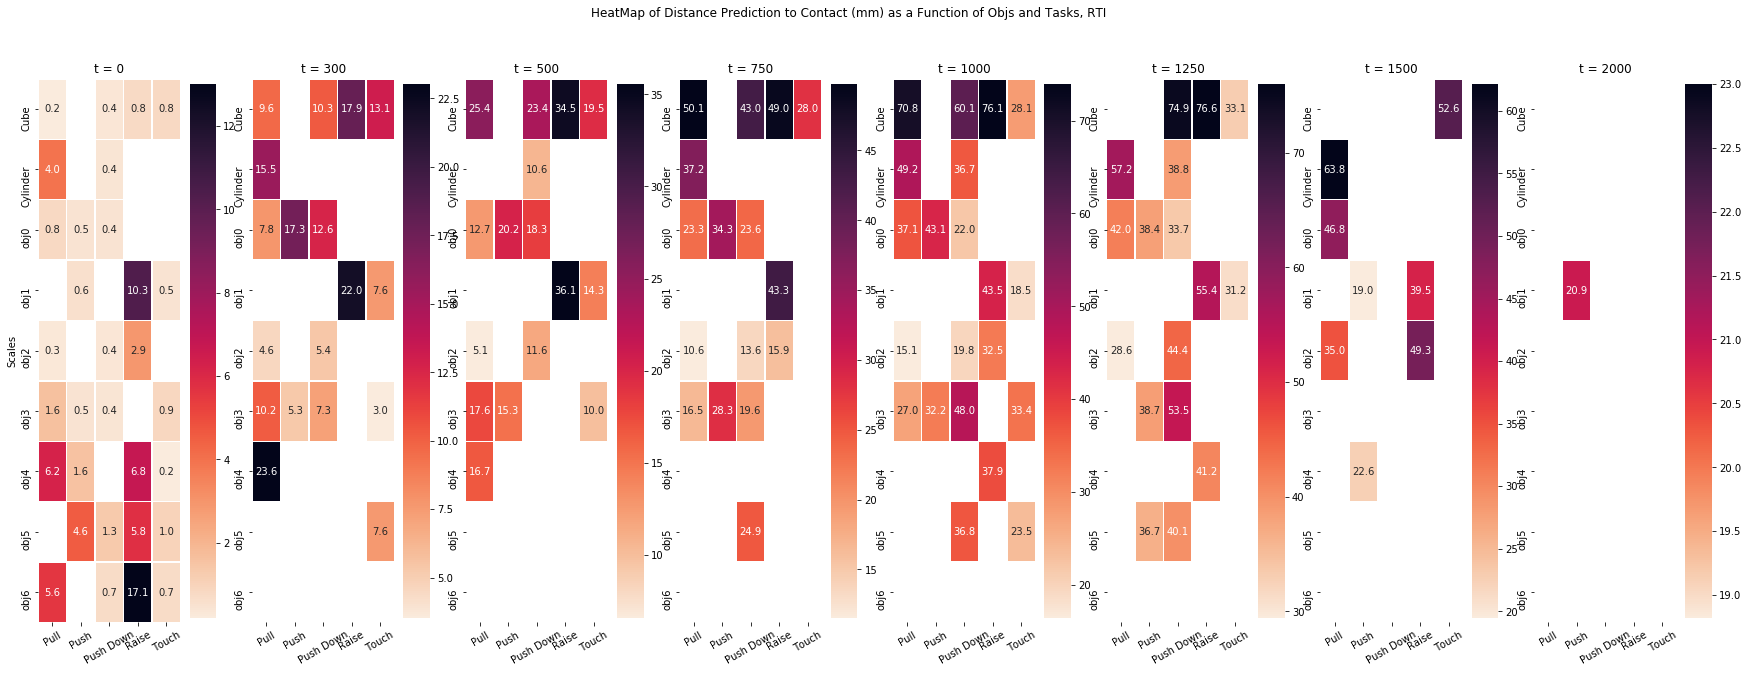

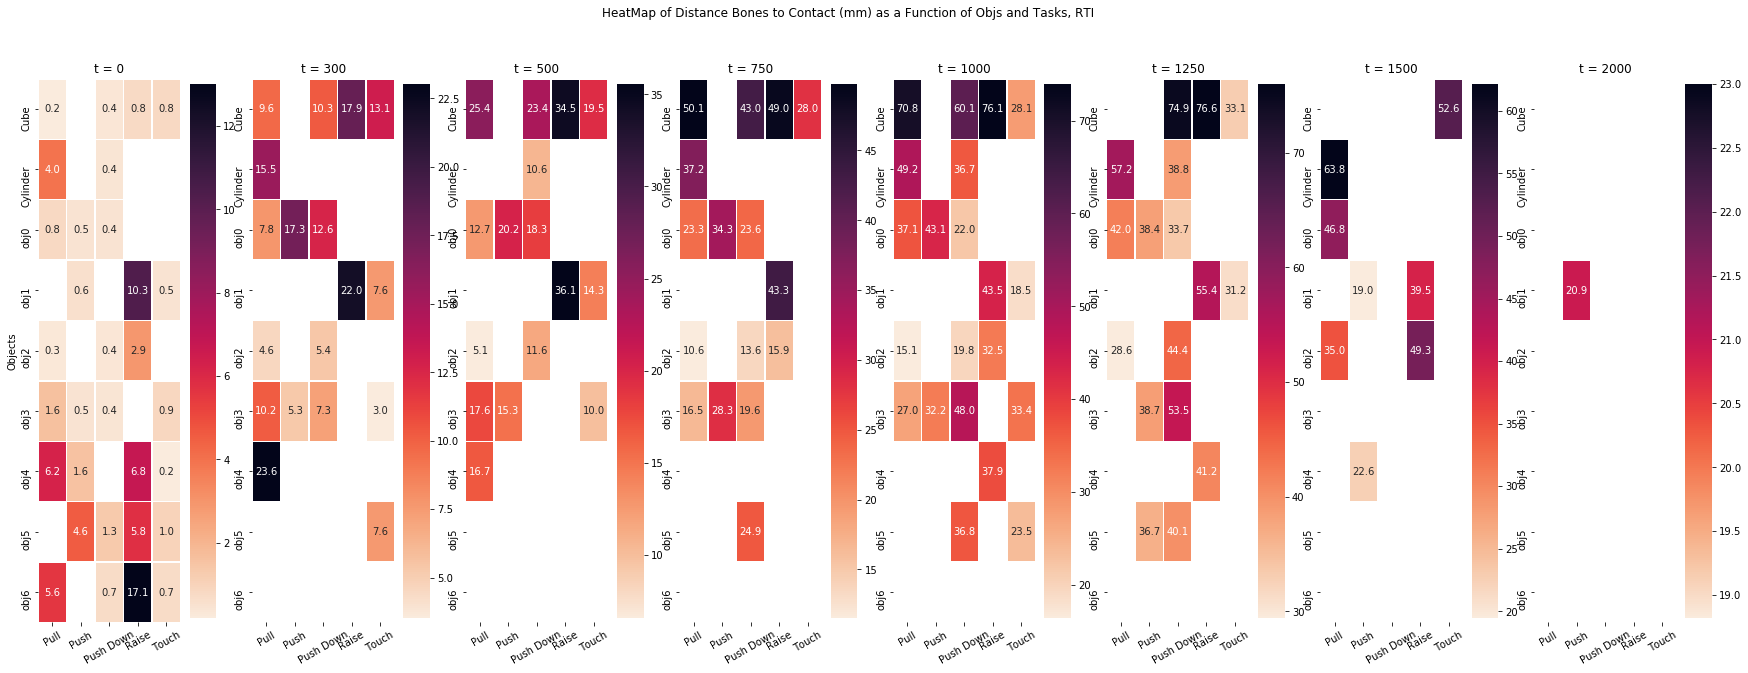

In [52]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskObj = pd.DataFrame()

    tol = tolTime[i]
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Task'] == tasks[gest]) & (finalData['Obj'] == objects[obj]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PredToFinal.9'].mean() + finalData[cond]['PredToFinal.6'].mean())/2

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Objs and Tasks, RTI')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskObj = pd.DataFrame()

    tol = tolTime[i]
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Task'] == tasks[gest]) & (finalData['Obj'] == objects[obj]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PredToFinal.9'].mean() + finalData[cond]['PredToFinal.6'].mean())/2

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
      
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Objs and Tasks, RTI')

plt.show()

## RTI Heatmap Scale/Object

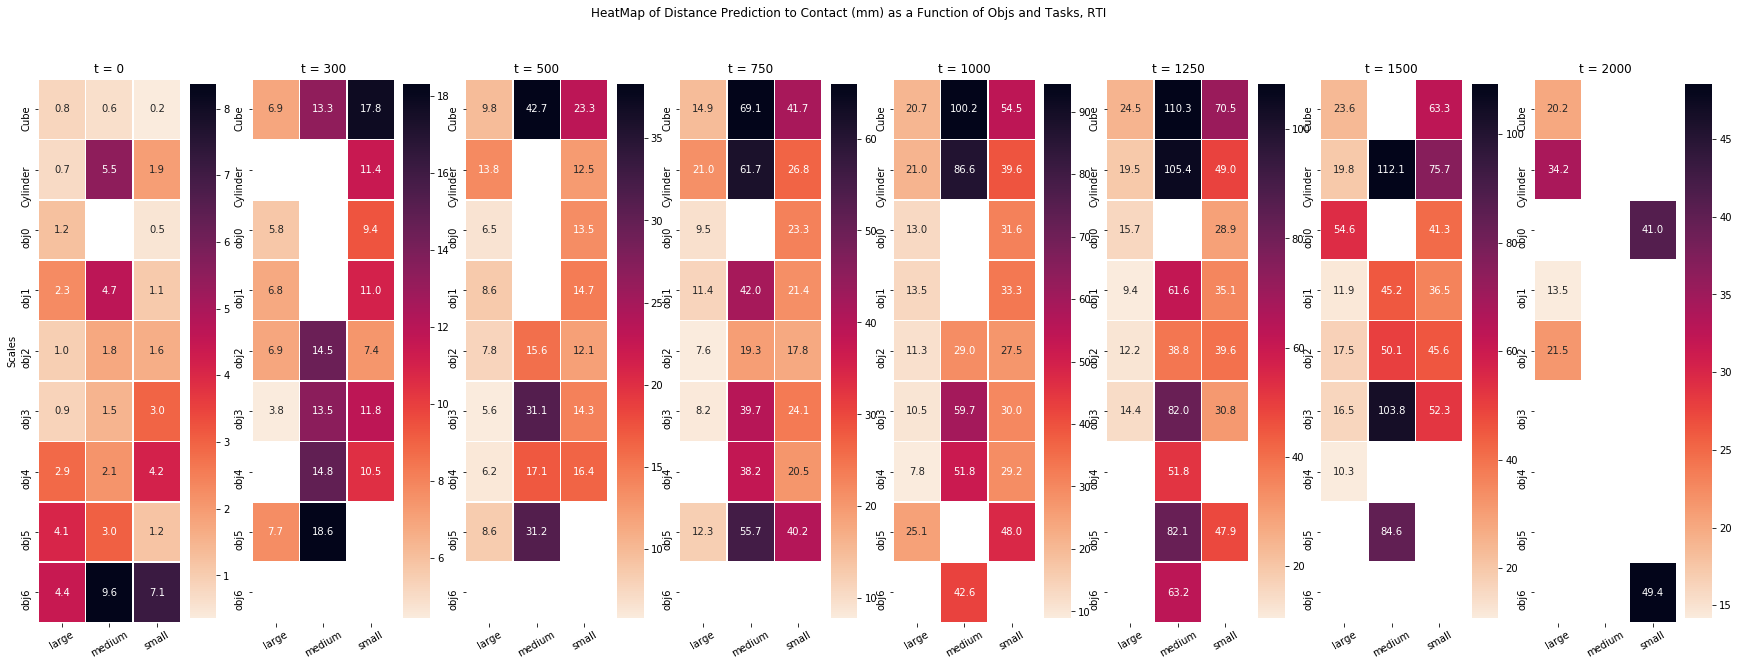

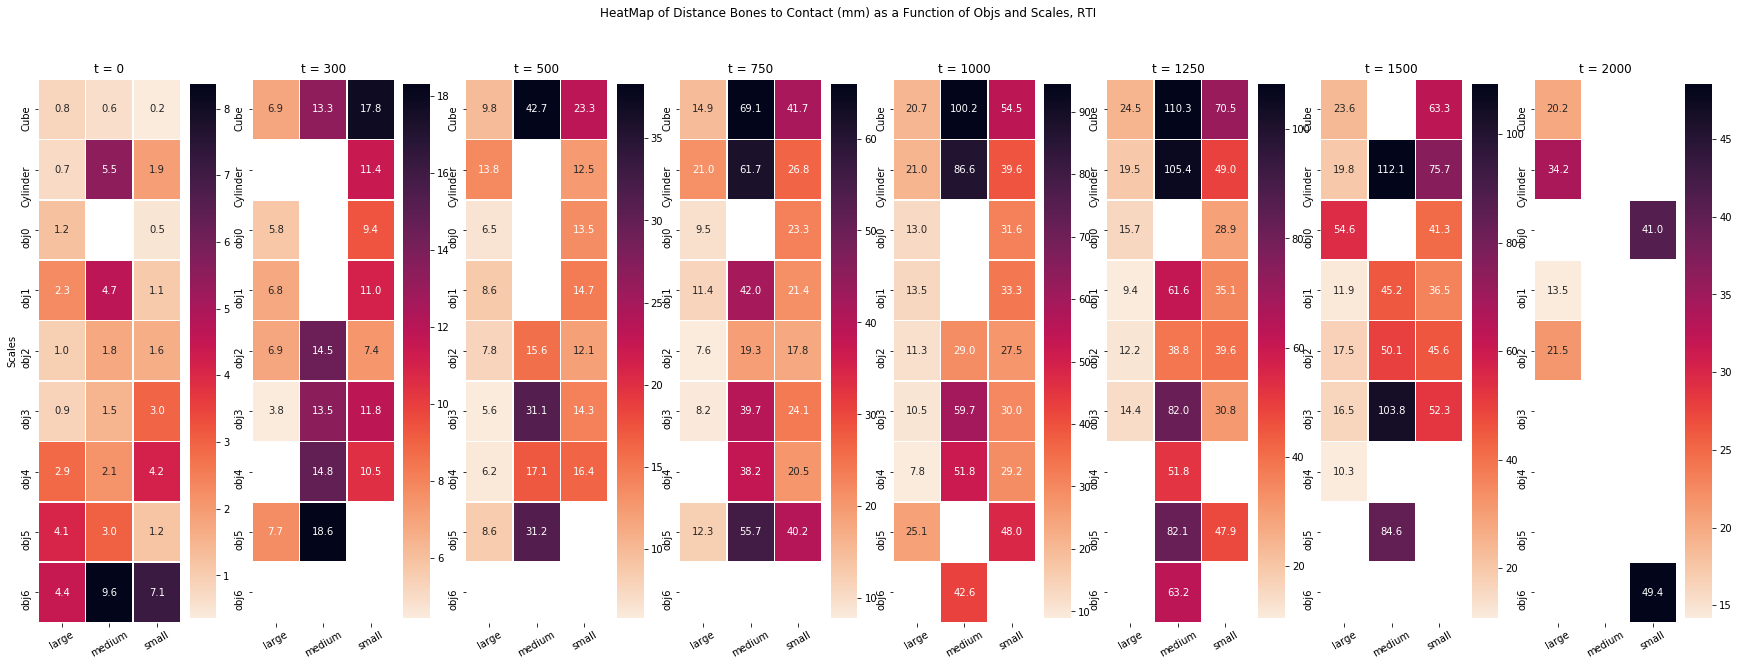

In [53]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    objScale = pd.DataFrame()

    tol = tolTime[i]
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Scale'] == scales[size]) & (finalData['Obj'] == objects[obj]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PredToFinal.9'].mean() + finalData[cond]['PredToFinal.6'].mean())/2

            objScale.loc[objects[obj], scales[size]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(objScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Objs and Tasks, RTI')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    objScale = pd.DataFrame()

    tol = tolTime[i]
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Scale'] == scales[size]) & (finalData['Obj'] == objects[obj]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PredToFinal.9'].mean() + finalData[cond]['PredToFinal.6'].mean())/2

            objScale.loc[objects[obj], scales[size]] = mean/nbUsers
      
    nameFig[i] = sns.heatmap(objScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Objs and Scales, RTI')

plt.show()